In [1]:
#Practical Data Science --- Assignment 2
#Student Name: Wyatt Lawrence Jenkins
#Student Number: s3770872

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.rcParams['figure.max_open_warning'] = 0

In [3]:
#-----------------------------------------Task 1: Retrieving and Preparing the Data --------------------------------------------

In [4]:
#Load the csv file. Kept column names in the file.
mice = pd.read_excel("Data_Cortex_Nuclear.xls", encoding='UTF-8', header=0, sep=',')

In [5]:
#Checking the datatypes of all columns in the dataset.
mice.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [6]:
mice.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [7]:
#Shows the count of NaN values for each column.
for column in mice:
    print(column + ': ' + str(mice[column].isnull().sum()) + '\n')

MouseID: 0

DYRK1A_N: 3

ITSN1_N: 3

BDNF_N: 3

NR1_N: 3

NR2A_N: 3

pAKT_N: 3

pBRAF_N: 3

pCAMKII_N: 3

pCREB_N: 3

pELK_N: 3

pERK_N: 3

pJNK_N: 3

PKCA_N: 3

pMEK_N: 3

pNR1_N: 3

pNR2A_N: 3

pNR2B_N: 3

pPKCAB_N: 3

pRSK_N: 3

AKT_N: 3

BRAF_N: 3

CAMKII_N: 3

CREB_N: 3

ELK_N: 18

ERK_N: 3

GSK3B_N: 3

JNK_N: 3

MEK_N: 7

TRKA_N: 3

RSK_N: 3

APP_N: 3

Bcatenin_N: 18

SOD1_N: 3

MTOR_N: 3

P38_N: 3

pMTOR_N: 3

DSCR1_N: 3

AMPKA_N: 3

NR2B_N: 3

pNUMB_N: 3

RAPTOR_N: 3

TIAM1_N: 3

pP70S6_N: 3

NUMB_N: 0

P70S6_N: 0

pGSK3B_N: 0

pPKCG_N: 0

CDK5_N: 0

S6_N: 0

ADARB1_N: 0

AcetylH3K9_N: 0

RRP1_N: 0

BAX_N: 0

ARC_N: 0

ERBB4_N: 0

nNOS_N: 0

Tau_N: 0

GFAP_N: 0

GluR3_N: 0

GluR4_N: 0

IL1B_N: 0

P3525_N: 0

pCASP9_N: 0

PSD95_N: 0

SNCA_N: 0

Ubiquitin_N: 0

pGSK3B_Tyr216_N: 0

SHH_N: 0

BAD_N: 213

BCL2_N: 285

pS6_N: 0

pCFOS_N: 75

SYP_N: 0

H3AcK18_N: 180

EGR1_N: 210

H3MeK4_N: 270

CaNA_N: 0

Genotype: 0

Treatment: 0

Behavior: 0

class: 0



In [8]:
#Inputes the mean value for all missing values for all 77 protein expressions.
for column in range(1, 78):
    for cell in range(0, len(mice)):
        if mice.iloc[cell, column] != mice.iloc[cell, column]:
            mice.iloc[cell, column] = mice.iloc[0:len(mice), column].mean(axis=0)

In [9]:
#Check to see that all missing values have been dealt with.
for column in mice:
    print(column + ': ' + str(mice[column].isnull().sum()) + '\n')

MouseID: 0

DYRK1A_N: 0

ITSN1_N: 0

BDNF_N: 0

NR1_N: 0

NR2A_N: 0

pAKT_N: 0

pBRAF_N: 0

pCAMKII_N: 0

pCREB_N: 0

pELK_N: 0

pERK_N: 0

pJNK_N: 0

PKCA_N: 0

pMEK_N: 0

pNR1_N: 0

pNR2A_N: 0

pNR2B_N: 0

pPKCAB_N: 0

pRSK_N: 0

AKT_N: 0

BRAF_N: 0

CAMKII_N: 0

CREB_N: 0

ELK_N: 0

ERK_N: 0

GSK3B_N: 0

JNK_N: 0

MEK_N: 0

TRKA_N: 0

RSK_N: 0

APP_N: 0

Bcatenin_N: 0

SOD1_N: 0

MTOR_N: 0

P38_N: 0

pMTOR_N: 0

DSCR1_N: 0

AMPKA_N: 0

NR2B_N: 0

pNUMB_N: 0

RAPTOR_N: 0

TIAM1_N: 0

pP70S6_N: 0

NUMB_N: 0

P70S6_N: 0

pGSK3B_N: 0

pPKCG_N: 0

CDK5_N: 0

S6_N: 0

ADARB1_N: 0

AcetylH3K9_N: 0

RRP1_N: 0

BAX_N: 0

ARC_N: 0

ERBB4_N: 0

nNOS_N: 0

Tau_N: 0

GFAP_N: 0

GluR3_N: 0

GluR4_N: 0

IL1B_N: 0

P3525_N: 0

pCASP9_N: 0

PSD95_N: 0

SNCA_N: 0

Ubiquitin_N: 0

pGSK3B_Tyr216_N: 0

SHH_N: 0

BAD_N: 0

BCL2_N: 0

pS6_N: 0

pCFOS_N: 0

SYP_N: 0

H3AcK18_N: 0

EGR1_N: 0

H3MeK4_N: 0

CaNA_N: 0

Genotype: 0

Treatment: 0

Behavior: 0

class: 0



In [10]:
#Sanity Check for any negative protein expressions in the data (as protein expressions should not be a negative value).
for column in range(1, 78):
    for cell in range(0, len(mice)):
        if mice.iloc[cell, column] < 0:
            print(str(mice.iloc[cell, column]) + "\n")

-0.062007874



In [11]:
#Replace the impossible negative protein expression value with the column's mean value.
for column in range(1, 78):
    for cell in range(0, len(mice)):
        if mice.iloc[cell, column] < 0:
            mice.iloc[cell, column] = mice.iloc[0:len(mice), column].mean(axis=0)

In [12]:
#Strips of any whitespace existing in the MouseID column.
mice['MouseID'] = mice['MouseID'].str.strip()

In [13]:
#Strip any whitespace exisiting in strings and check for any typos using value_counts().
mice['Genotype'] = mice['Genotype'].str.strip()
mice['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [14]:
#Strip any whitespace exisiting in strings and check for any typos using value_counts().
mice['Treatment'] = mice['Treatment'].str.strip()
mice['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

In [15]:
#Strip any whitespace exisiting in strings and check for any typos using value_counts().
mice['Behavior'] = mice['Behavior'].str.strip()
mice['Behavior'].value_counts()

S/C    555
C/S    525
Name: Behavior, dtype: int64

In [16]:
#Strip any whitespace exisiting in strings and check for any typos using value_counts().
mice['class'] = mice['class'].str.strip()
mice['class'].value_counts()

c-SC-m    150
c-CS-m    150
t-SC-s    135
t-CS-m    135
c-SC-s    135
c-CS-s    135
t-SC-m    135
t-CS-s    105
Name: class, dtype: int64

In [17]:
#--------------------------------------------Task 2: Data Exploration (2.1)-----------------------------------------------------

In [18]:
#Displays a set of descriptive statsitics on each column of the dataset.
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.028989,0.026461,0.023519,0.014276,0.023018,0.066432,0.054222,0.036261,0.048069,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.159168,0.174271,1.081423
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,0.224000,0.157914,0.134762,0.121626,0.128466,0.448459,0.169609,0.183135,0.205440,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.167584,0.139331,0.131955,0.142427,0.490773,0.187174,0.196133,0.219242,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


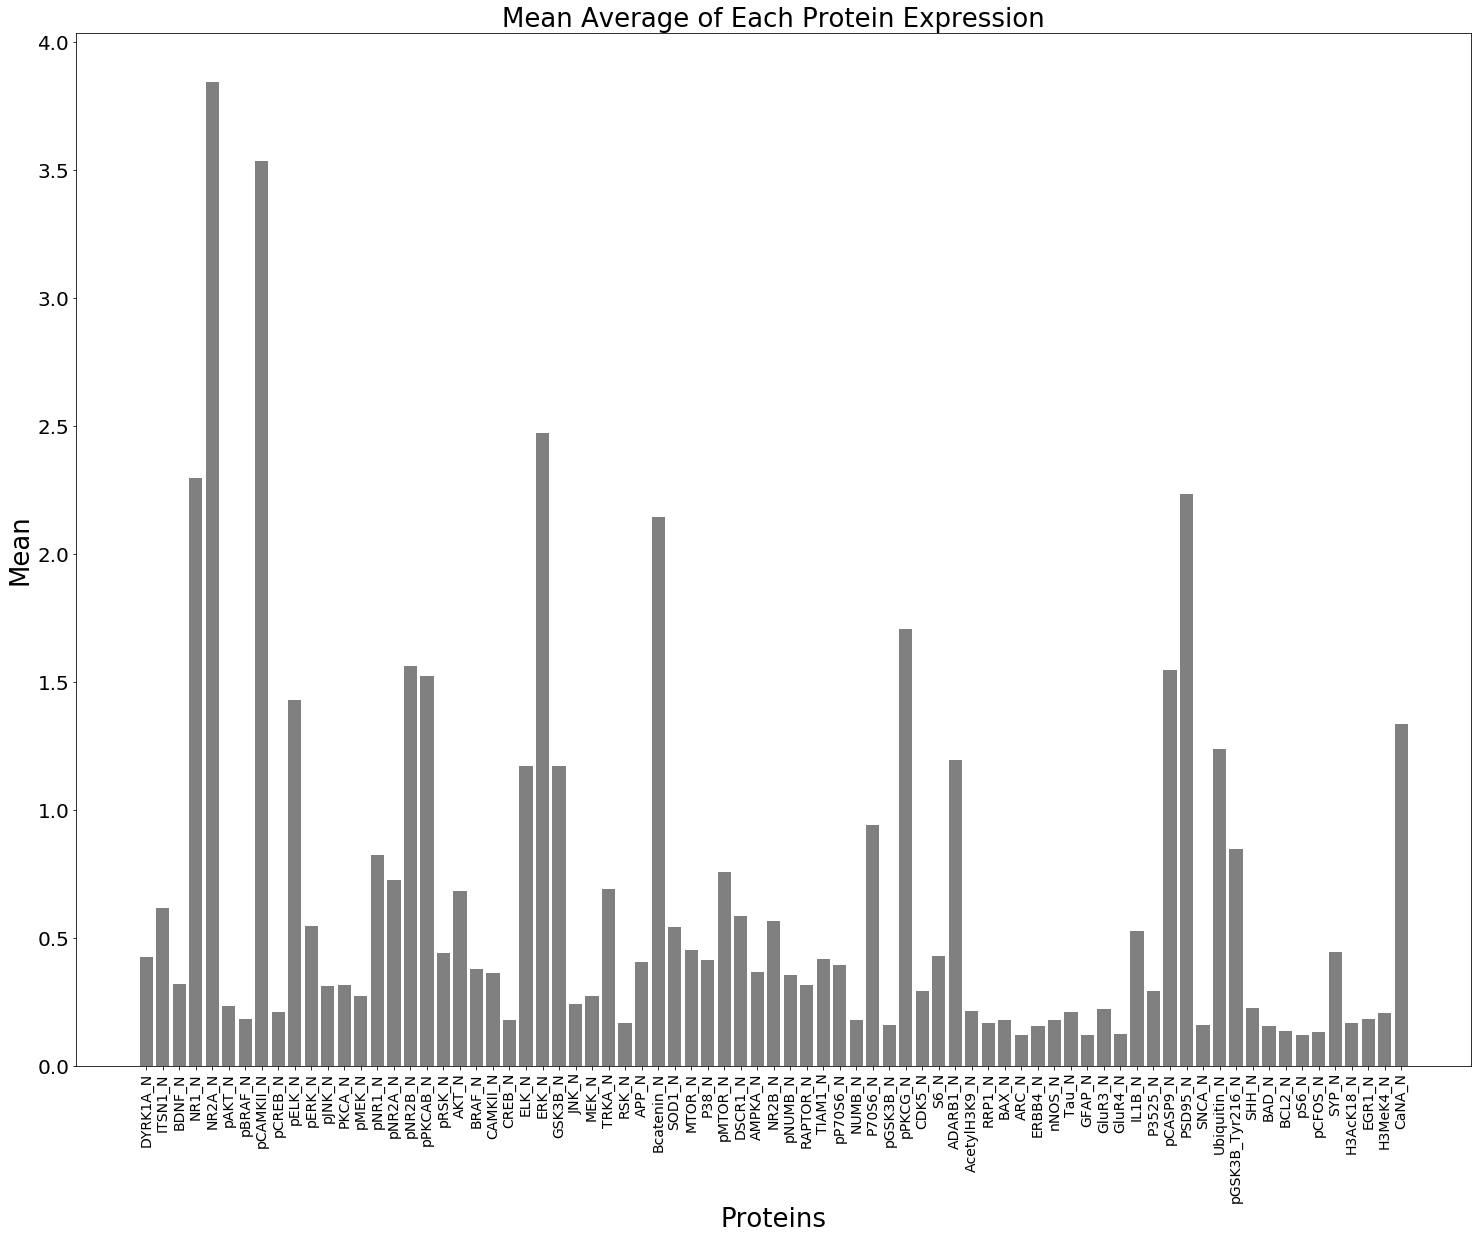

In [19]:
#Creates a bar chart that shows the mean value of each protein expression.

x_labels = ["DYRK1A_N", "ITSN1_N", "BDNF_N", "NR1_N", "NR2A_N", "pAKT_N", "pBRAF_N", "pCAMKII_N", "pCREB_N", "pELK_N",
"pERK_N", "pJNK_N", "PKCA_N", "pMEK_N", "pNR1_N", "pNR2A_N", "pNR2B_N", "pPKCAB_N", "pRSK_N", "AKT_N", "BRAF_N", "CAMKII_N",
"CREB_N", "ELK_N", "ERK_N", "GSK3B_N", "JNK_N", "MEK_N", "TRKA_N", "RSK_N", "APP_N", "Bcatenin_N", "SOD1_N", "MTOR_N",
"P38_N", "pMTOR_N", "DSCR1_N", "AMPKA_N", "NR2B_N", "pNUMB_N", "RAPTOR_N", "TIAM1_N", "pP70S6_N", "NUMB_N", "P70S6_N",
"pGSK3B_N", "pPKCG_N", "CDK5_N", "S6_N", "ADARB1_N", "AcetylH3K9_N", "RRP1_N", "BAX_N", "ARC_N", "ERBB4_N", "nNOS_N", "Tau_N", 
"GFAP_N", "GluR3_N", "GluR4_N", "IL1B_N", "P3525_N", "pCASP9_N", "PSD95_N", "SNCA_N", "Ubiquitin_N", "pGSK3B_Tyr216_N", "SHH_N", 
"BAD_N", "BCL2_N", "pS6_N", "pCFOS_N", "SYP_N", "H3AcK18_N", "EGR1_N", "H3MeK4_N", "CaNA_N"]


plt.figure(figsize=(25, 19))
plt.bar(x_labels, mice[mice.columns[1:78]].mean(), color='grey')
plt.title('Mean Average of Each Protein Expression', fontsize=26)
plt.xlabel('Proteins', fontsize=26)
plt.ylabel('Mean', fontsize=26)
plt.xticks(rotation='vertical', fontsize=14)
plt.yticks(fontsize=20)

plt.show()

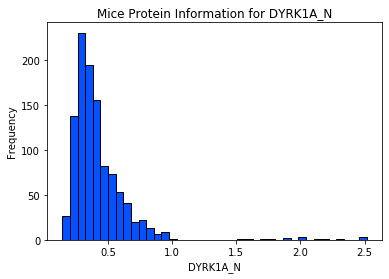

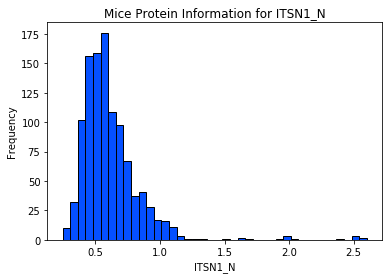

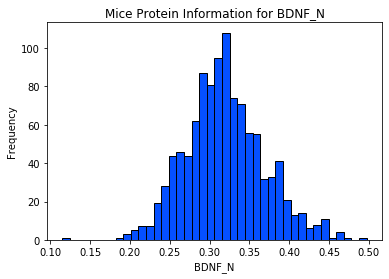

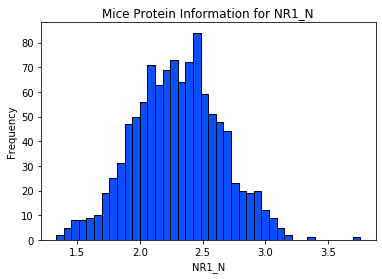

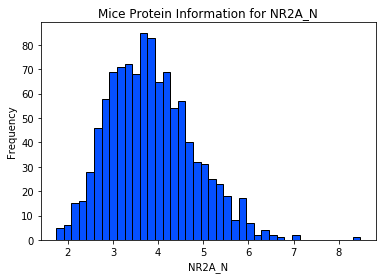

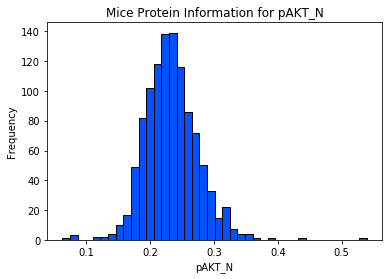

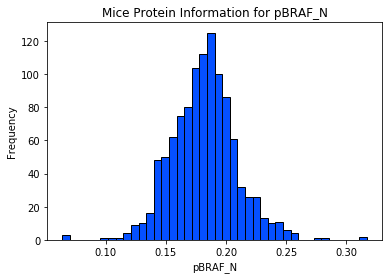

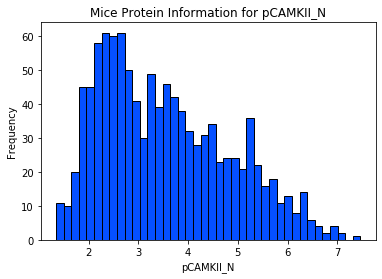

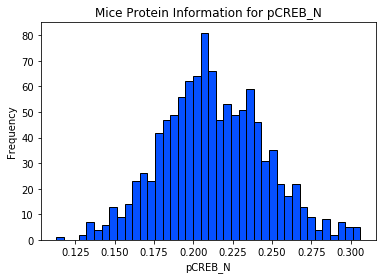

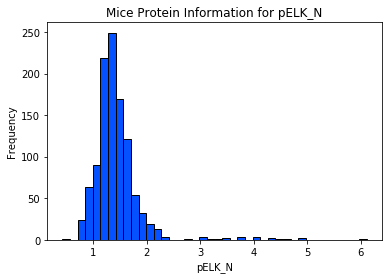

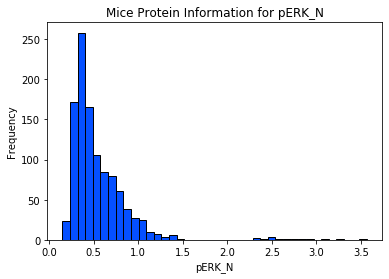

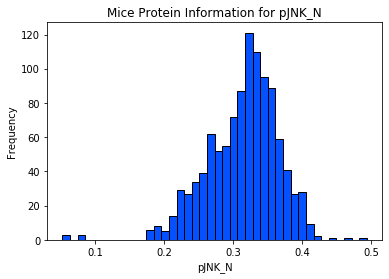

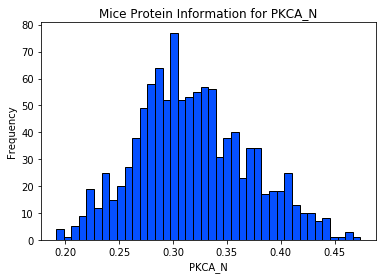

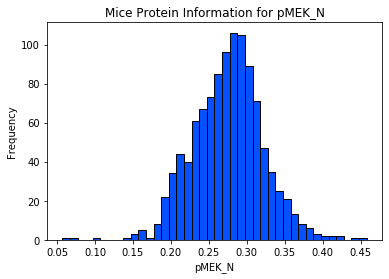

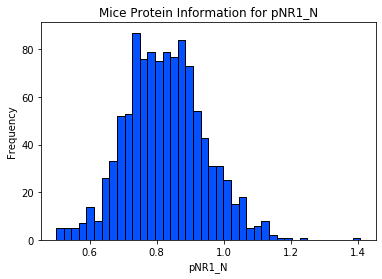

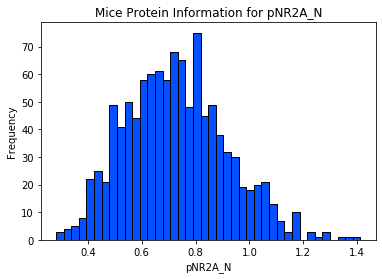

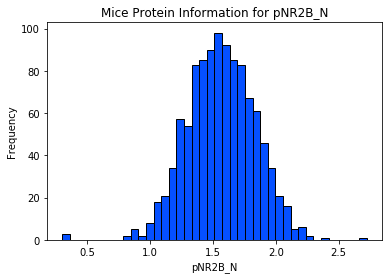

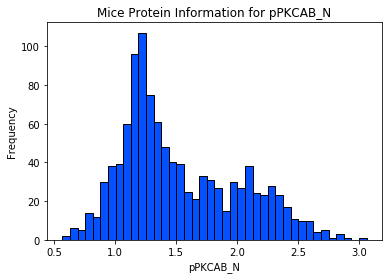

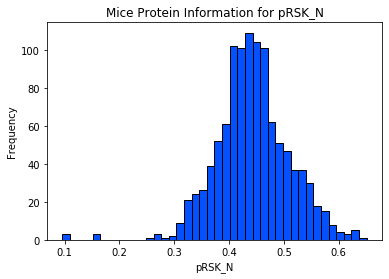

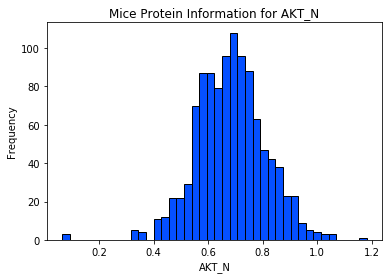

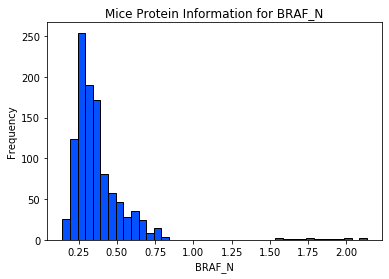

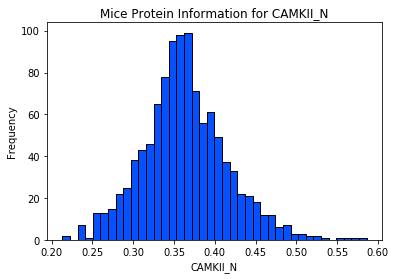

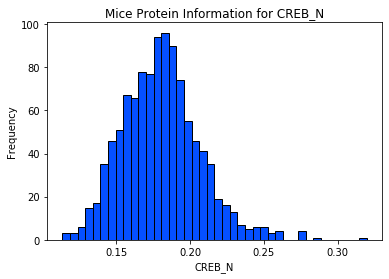

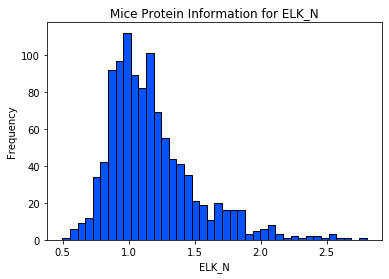

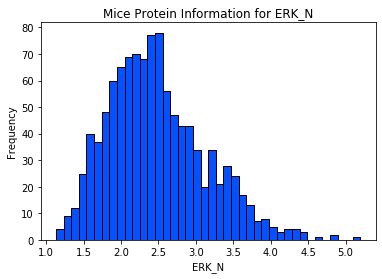

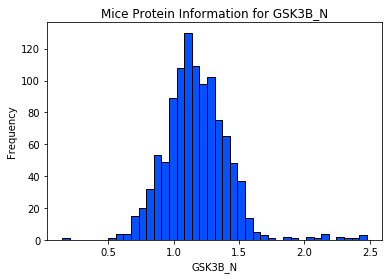

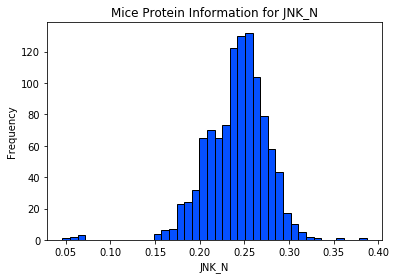

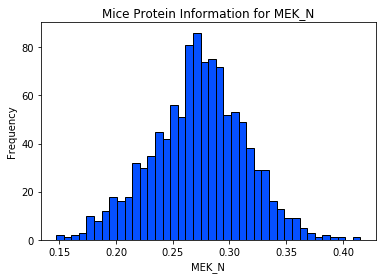

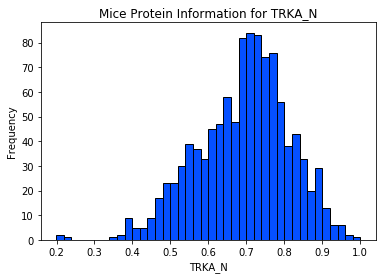

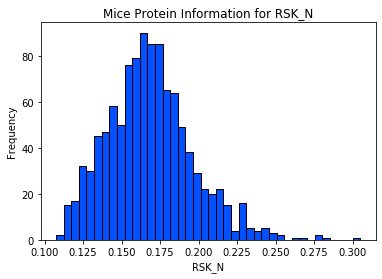

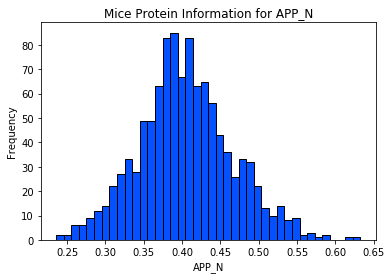

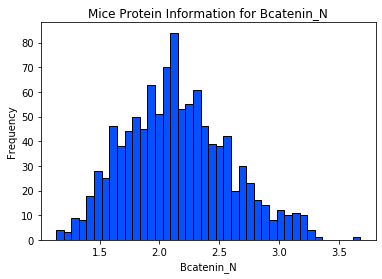

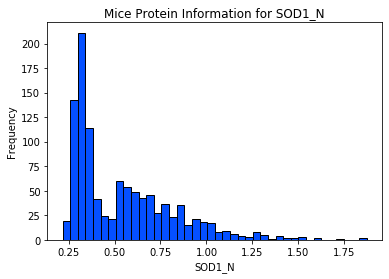

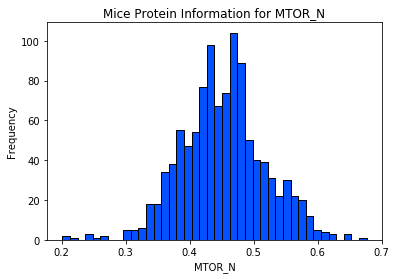

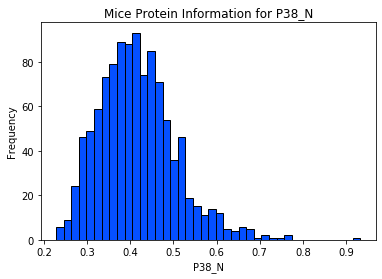

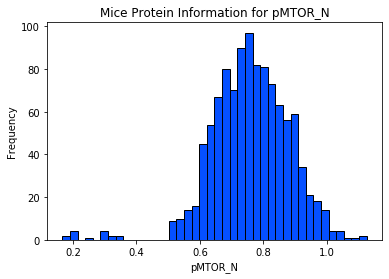

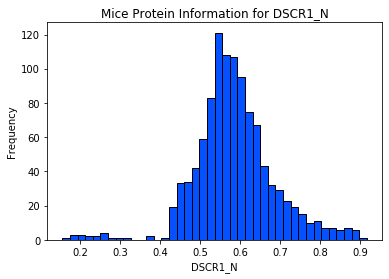

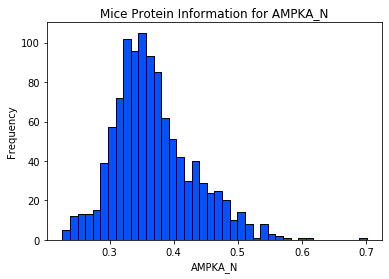

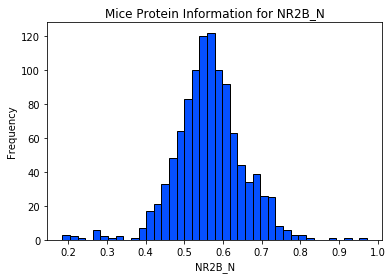

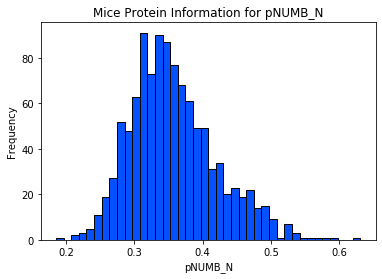

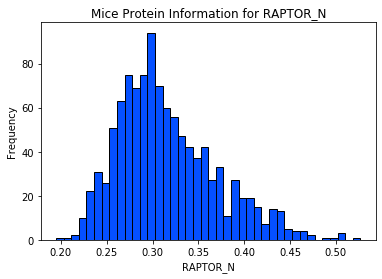

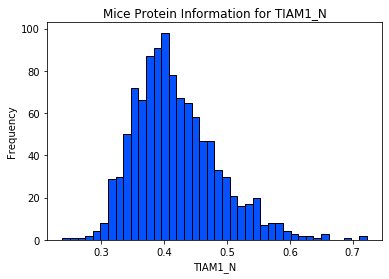

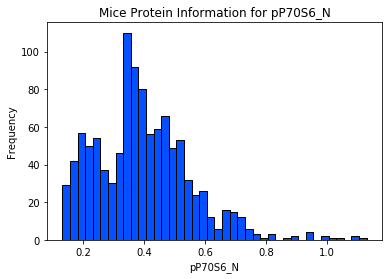

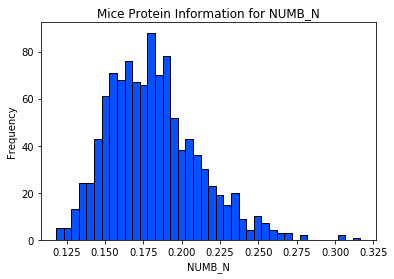

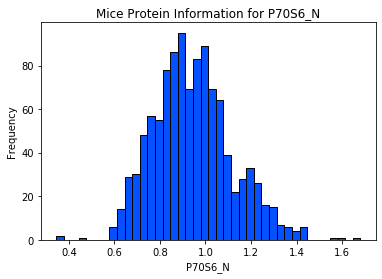

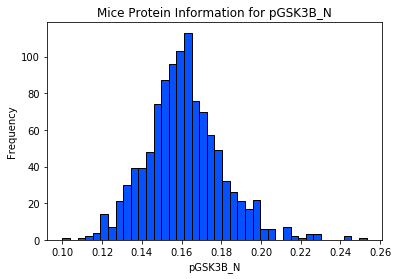

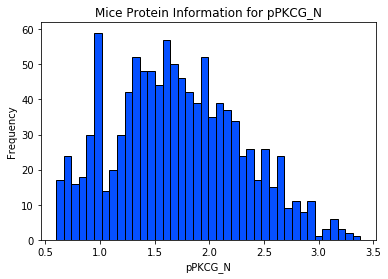

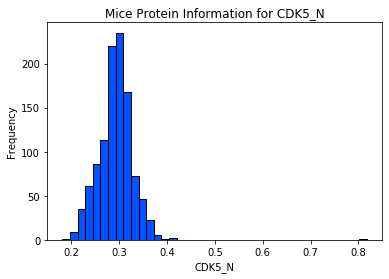

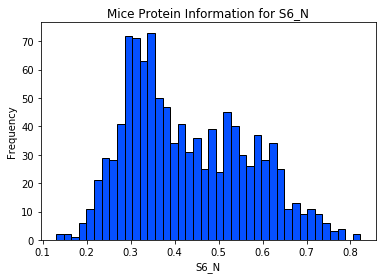

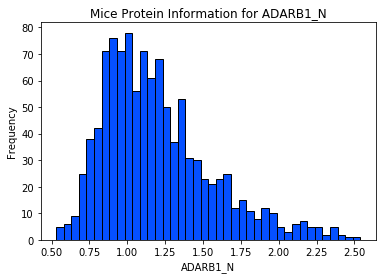

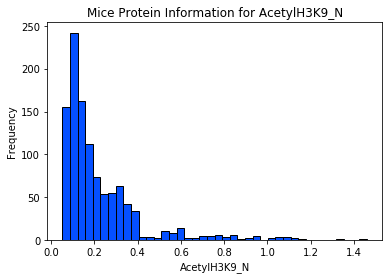

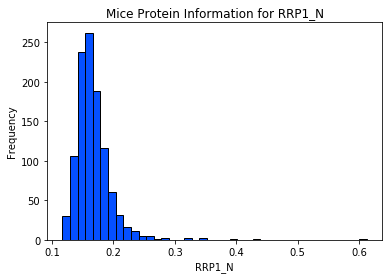

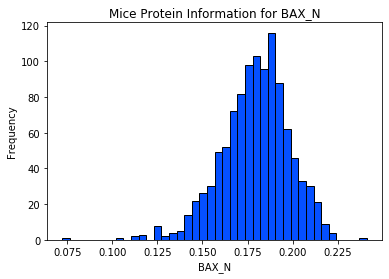

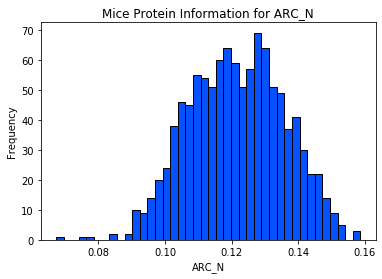

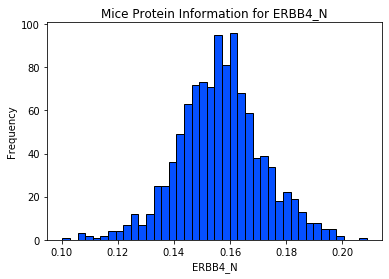

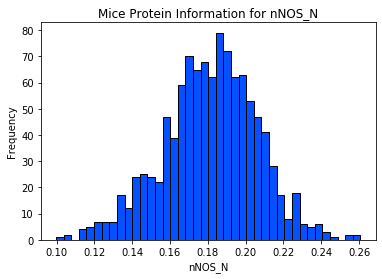

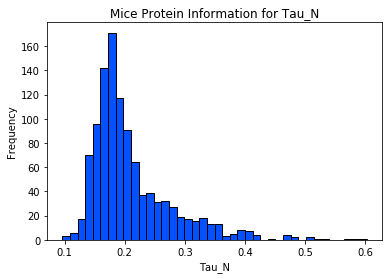

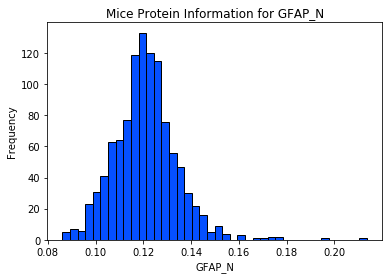

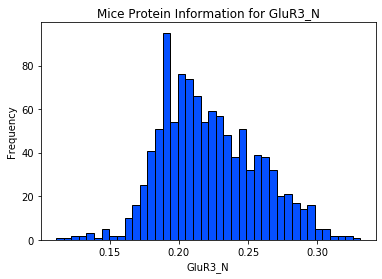

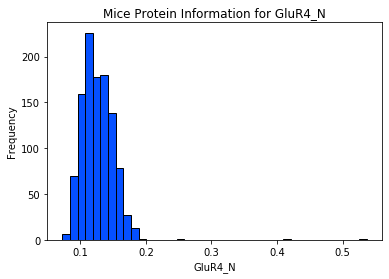

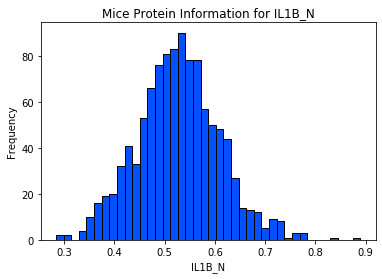

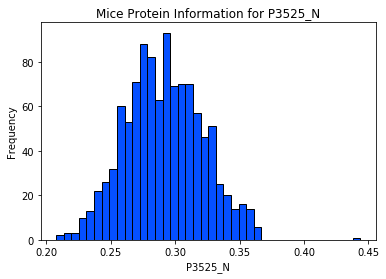

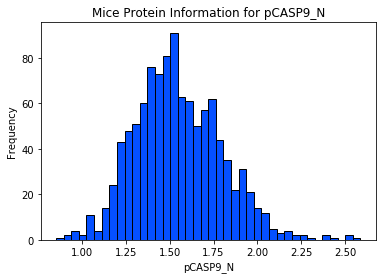

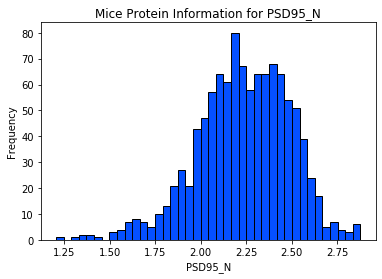

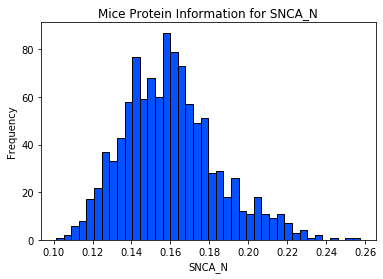

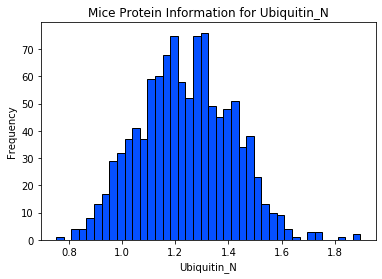

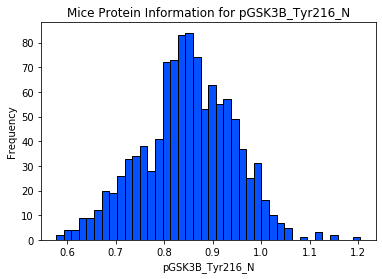

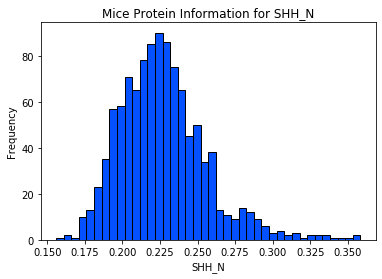

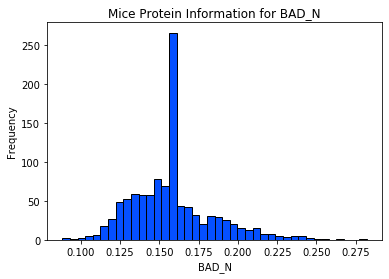

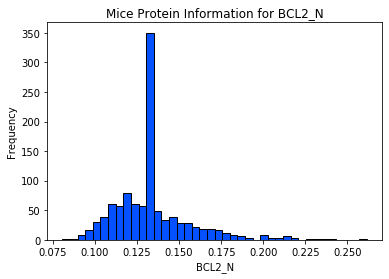

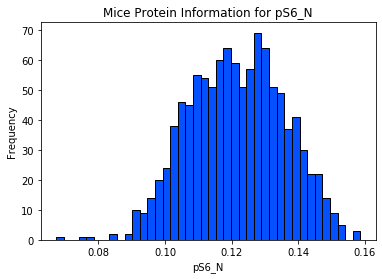

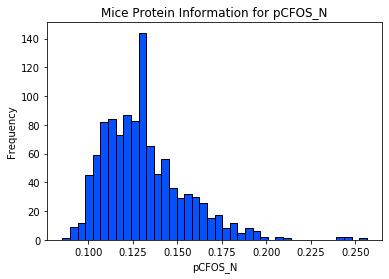

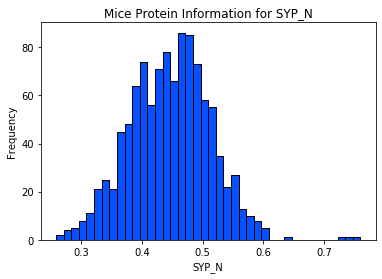

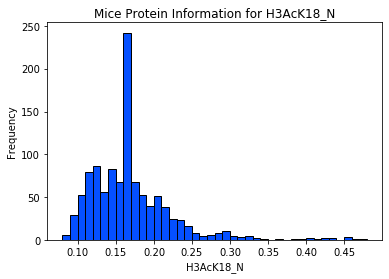

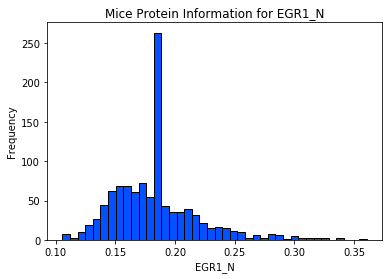

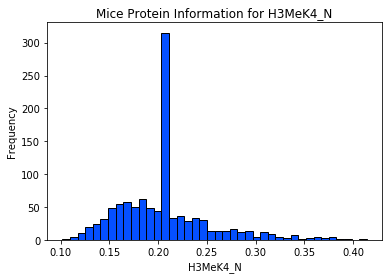

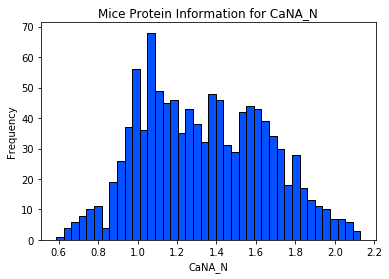

In [20]:
#Generates a histogram for each protein in the dataset and shows the frequency of the values across 40 bins.

for protein in range(1,78):
    mice[mice.columns[protein]].plot(kind='hist', bins=40, color='#0550ff', edgecolor='black')
    plt.title('Mice Protein Information for ' + str(mice.columns[protein]), fontsize=12)
    plt.xlabel(mice.columns[protein])
    plt.show()

In [21]:
#--------------------------------------------Task 2: Data Exploration (2.2)-----------------------------------------------------

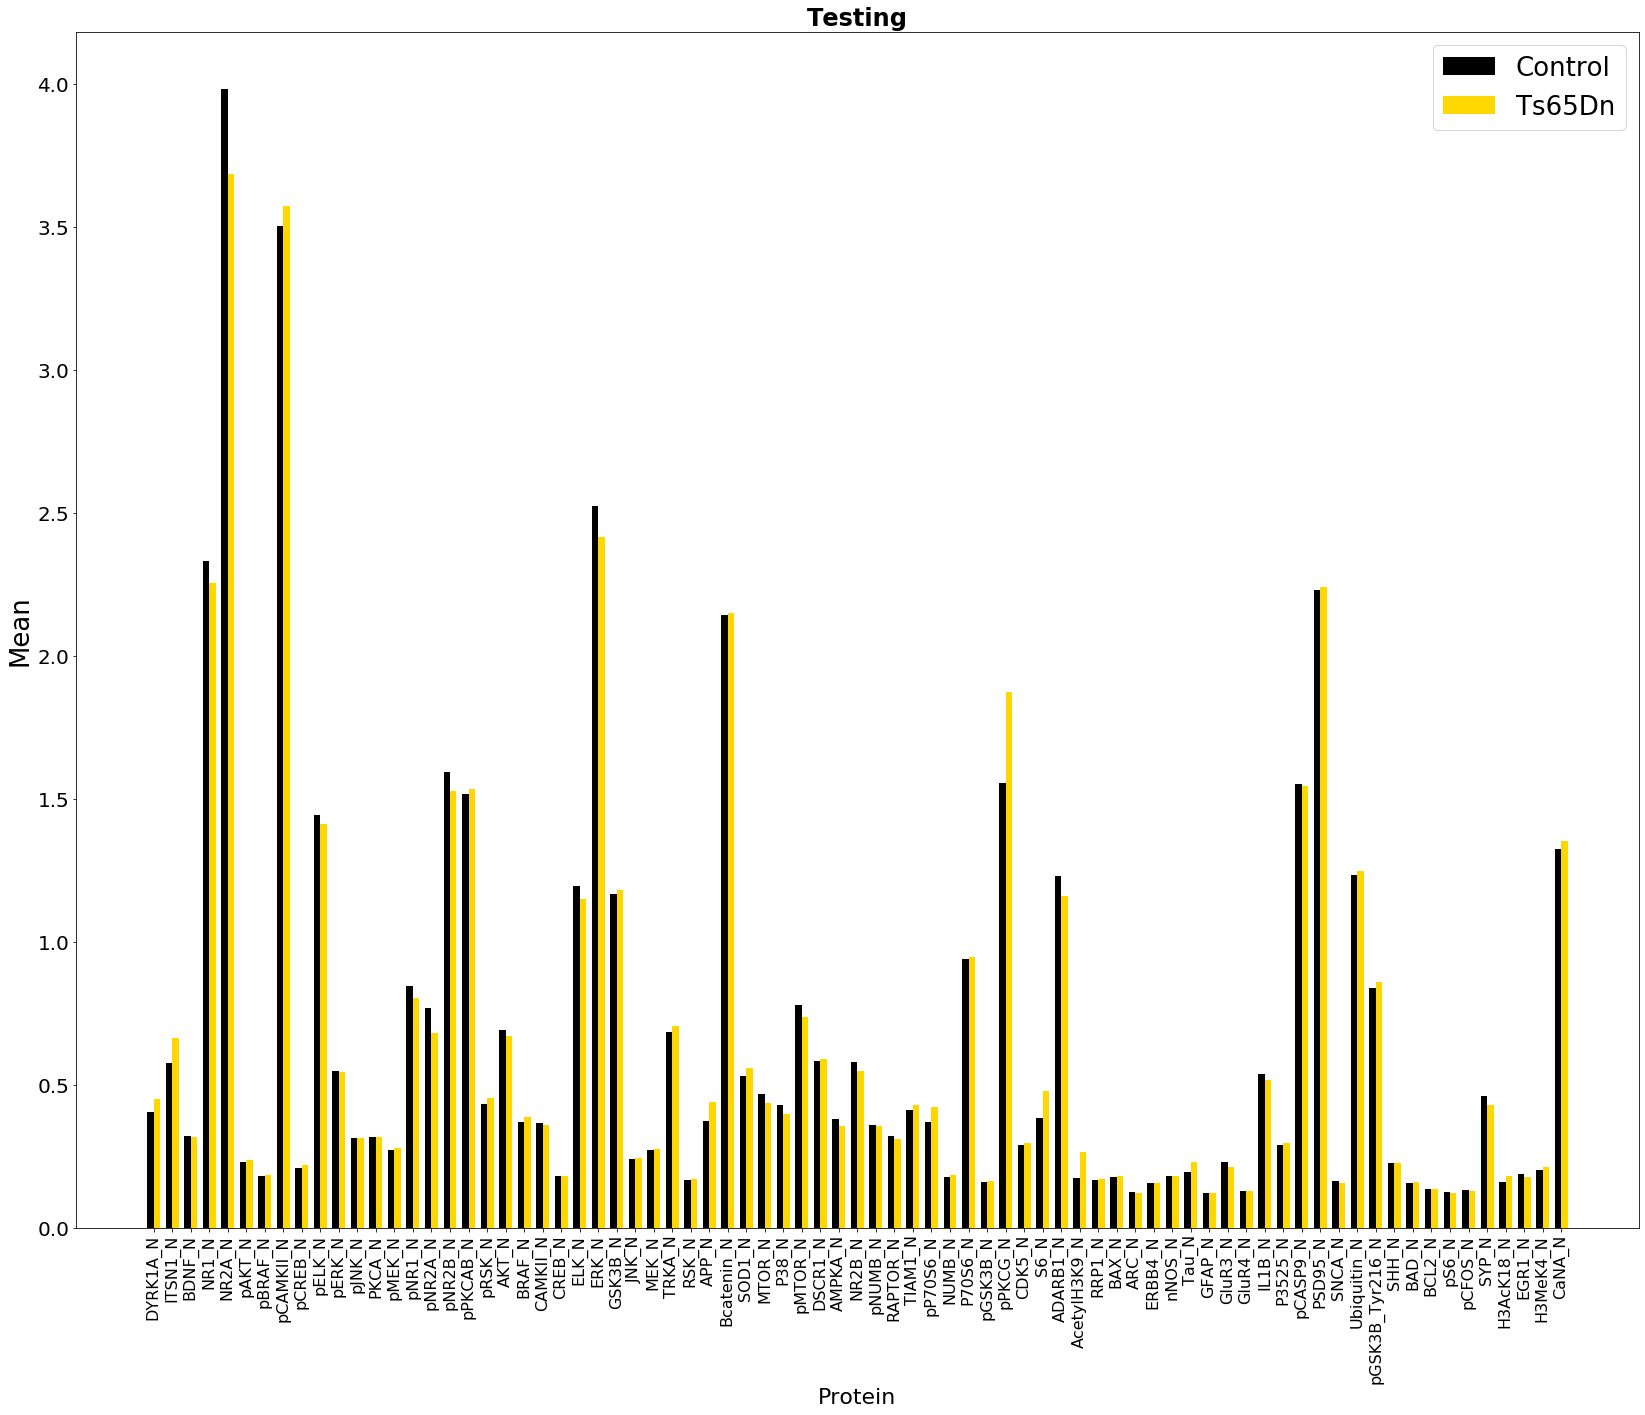

In [22]:
#Hypothesis 1: There is a difference in the average protein expression level for any given protein between control mice
#              and mice with down syndrome.

#Draws a bar chart that shows the mean of each Protein Expresison in each Genotype group relative to every other protein.

#Masks used to differentiate between the two different Genotype groups.
mice_control = mice[(mice['Genotype'] == 'Control')]
mice_Ts65Dn = mice[(mice['Genotype'] == 'Ts65Dn')]

#Calculates the mean for each of the two Genotype groups.
control_mean = mice_control[mice_control.columns[1:78]].mean(axis=0)
Ts65Dn_mean = mice_Ts65Dn[mice_Ts65Dn.columns[1:78]].mean(axis=0)

width = 0.35
                          
x1 = np.arange(len(control_mean))
x2 = [x + width for x in x1]

plt.figure(figsize=(28, 22))
plt.bar(x1, control_mean, color='black', width=width, label='Control')
plt.bar(x2, Ts65Dn_mean, color='gold', width=width, label='Ts65Dn')
plt.title('Testing', fontweight='bold', fontsize=24)
plt.xlabel('Protein', fontsize=22)
plt.ylabel('Mean', fontsize=26)
plt.xticks([r + width / 2 for r in range(len(control_mean))], x_labels, fontsize=16, rotation='vertical')
plt.yticks(fontsize=20)

plt.legend(fontsize=26, loc='best')
plt.show()

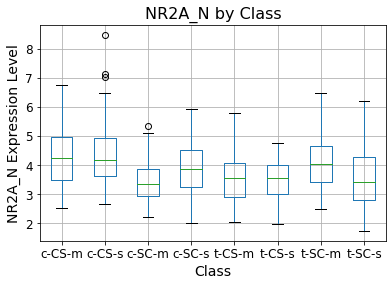

In [23]:
#Hypothesis 2: There are some classes of mice that will exhibit higher levels of a particular protein than others.

mice.boxplot(column='NR2A_N', by ='class')
plt.title('NR2A_N by Class', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Class', fontsize=14)
plt.ylabel('NR2A_N Expression Level', fontsize=14)
plt.suptitle("")

plt.show()

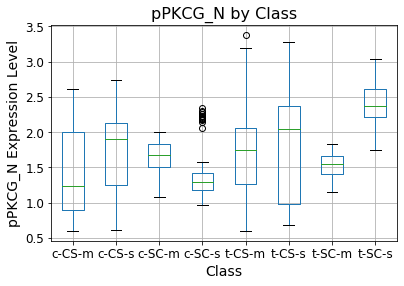

In [24]:
#Hypothesis 3: Continuing from Hypothesis 2, we will check if there is a relationship in the pPKCG_N protein as there is also a
#              significant difference between control mice and trisomic mice.

mice.boxplot(column='pPKCG_N', by ='class')
plt.title('pPKCG_N by Class', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Class', fontsize=14)
plt.ylabel('pPKCG_N Expression Level', fontsize=14)
plt.suptitle("")

plt.show()

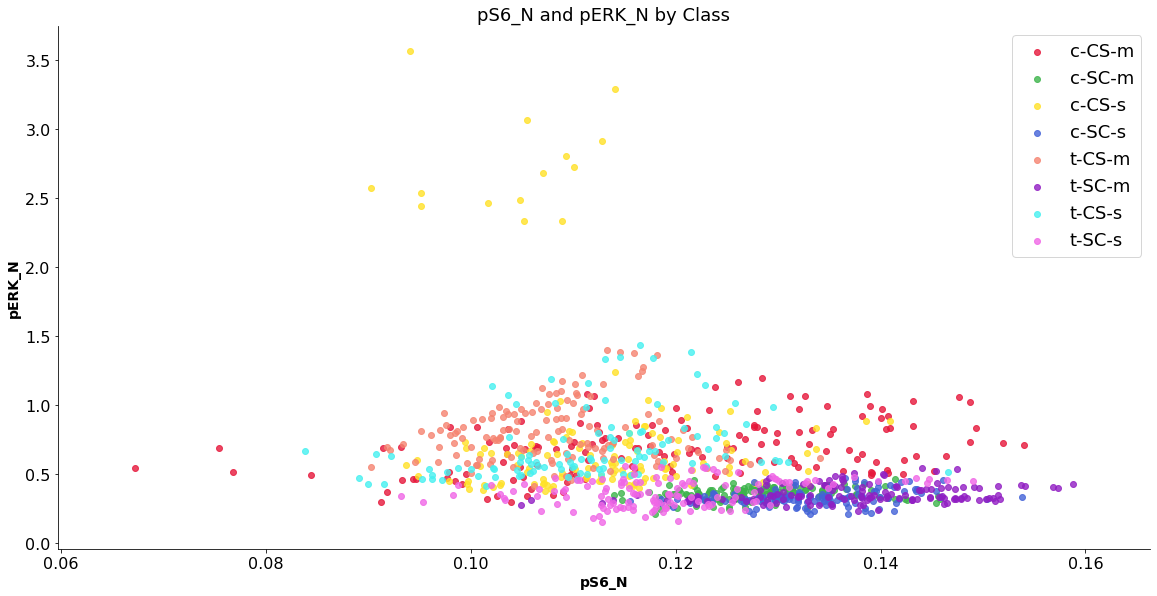

In [25]:
#Hypothesis 4: There will exist some proteins that are discriminant between certain classes of mice.

sn.lmplot(x="pS6_N", y="pERK_N", data=mice, fit_reg=False, palette=['#e6183b', '#3db44b', '#ffe128', '#4363d8', '#f58471', '#911ec3', '#46f0f0', '#f067e6'], hue='class', legend=False, aspect=2, height=8)
plt.title("pS6_N and pERK_N by Class", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("pS6_N", fontsize=14,  fontweight='bold')
plt.ylabel("pERK_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

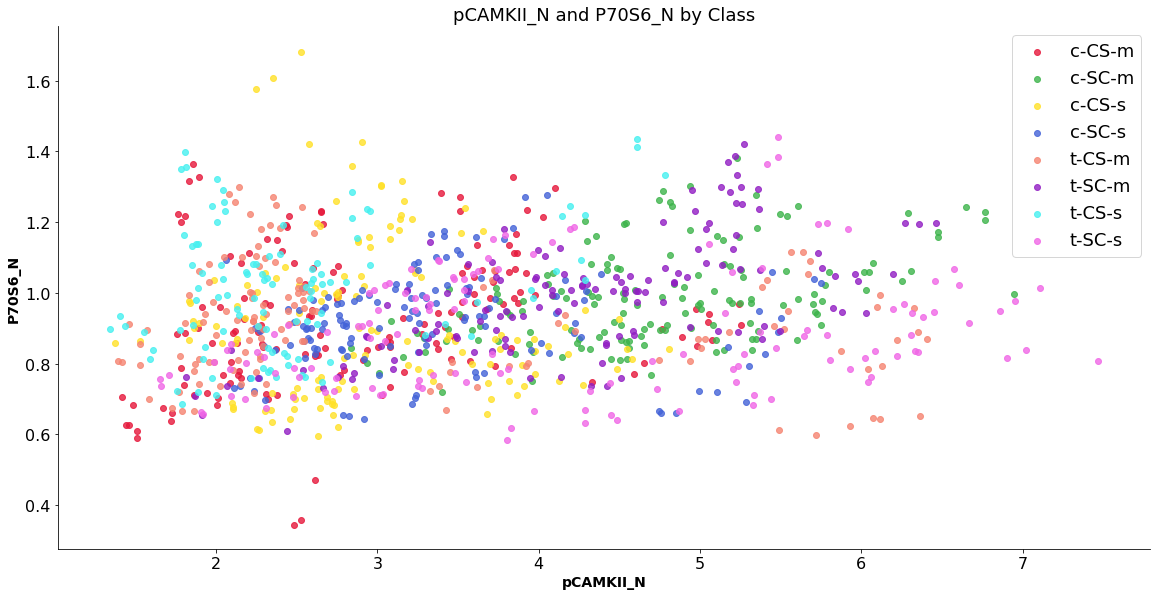

In [26]:
#Hypothesis 5: As range of the means between pCAMKII_N and P70S6 is quite large, we may see some interesting relationship between
#              these two proteins.

sn.lmplot(x="pCAMKII_N", y="P70S6_N", data=mice, fit_reg=False, palette=['#e6183b', '#3db44b', '#ffe128', '#4363d8', '#f58471', '#911ec3', '#46f0f0', '#f067e6'], hue='class', legend=False, aspect=2, height=8)
plt.title("pCAMKII_N and P70S6_N by Class", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("pCAMKII_N", fontsize=14,  fontweight='bold')
plt.ylabel("P70S6_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

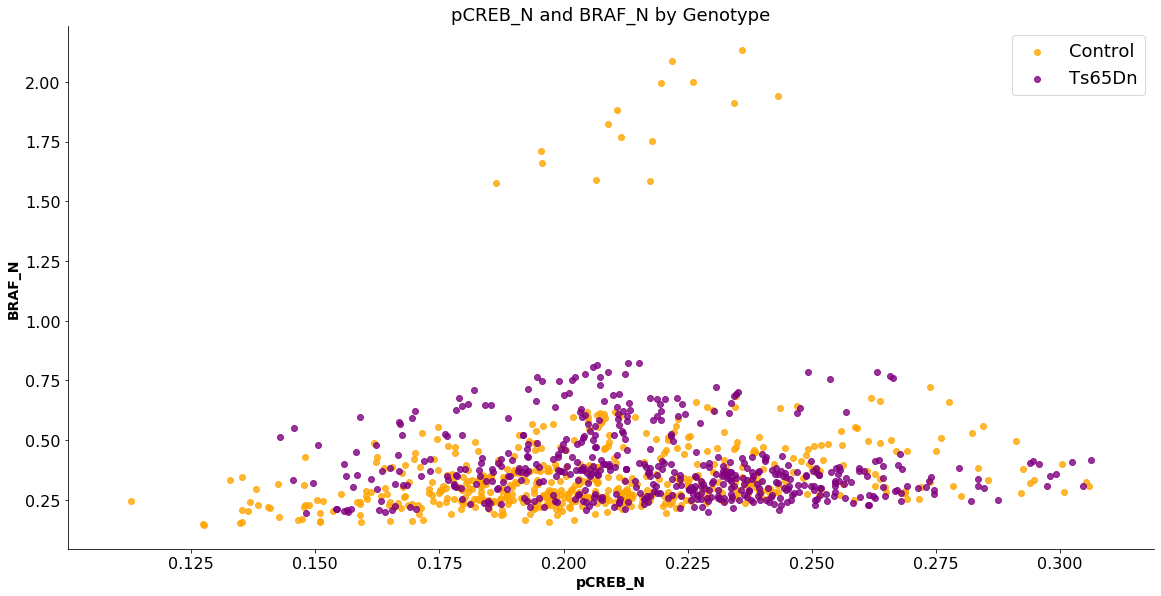

In [27]:
#Hypothesis 6: Some proteins will be higher in either trisomic mice or control mice.

sn.lmplot(x="pCREB_N", y="BRAF_N", data=mice, fit_reg=False, palette=['orange', 'purple'], hue='Genotype', legend=False, aspect=2, height=8)
plt.title("pCREB_N and BRAF_N by Genotype", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("pCREB_N", fontsize=14,  fontweight='bold')
plt.ylabel("BRAF_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

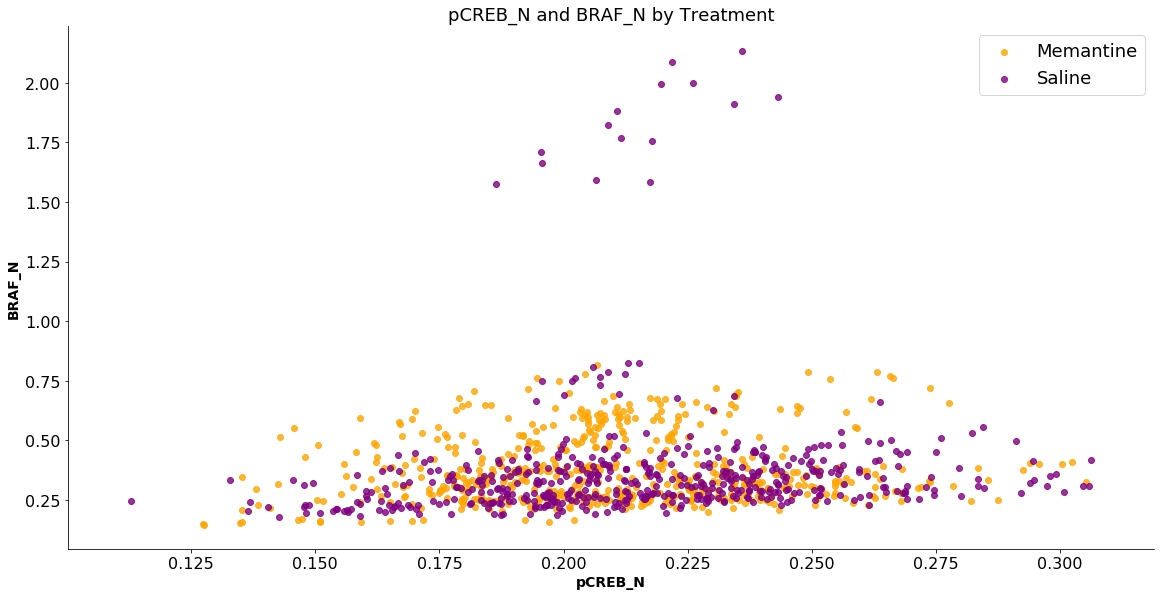

In [28]:
#Hypothesis 7: The effect of treatment has produced a significant difference in protein expression levels.

sn.lmplot(x="pCREB_N", y="BRAF_N", data=mice, fit_reg=False, palette=['orange', 'purple'], hue='Treatment', legend=False, aspect=2, height=8)
plt.title("pCREB_N and BRAF_N by Treatment", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("pCREB_N", fontsize=14,  fontweight='bold')
plt.ylabel("BRAF_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

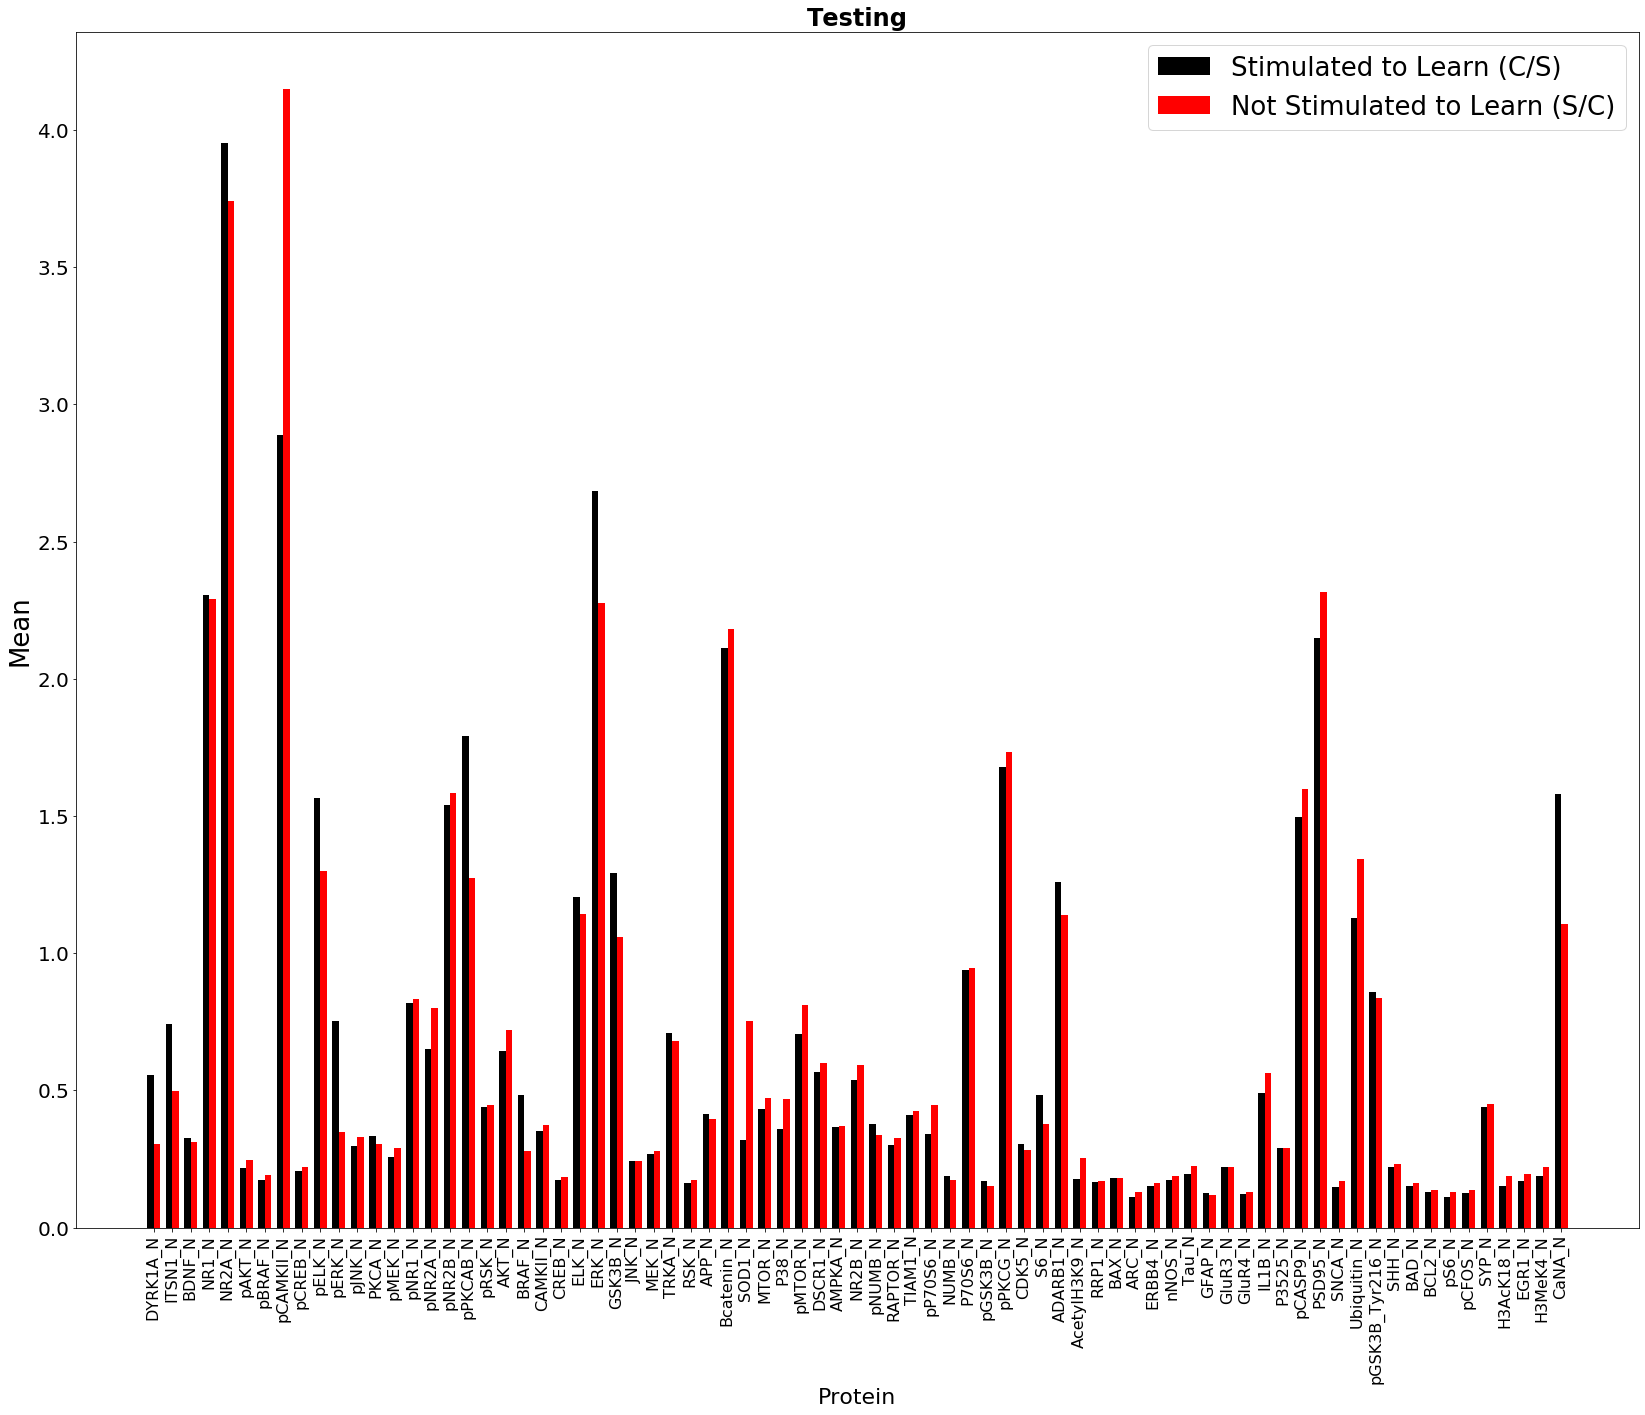

In [29]:
#Hypothesis 8: There is a difference in the average protein expression level for any given protein between control mice
#              and mice with down syndrome.


mice_CS = mice[(mice['Behavior'] == 'C/S')]
mice_SC = mice[(mice['Behavior'] == 'S/C')]

CS_mean = mice_CS[mice_CS.columns[1:78]].mean(axis=0)
SC_mean = mice_SC[mice_SC.columns[1:78]].mean(axis=0)

width = 0.35
                          
x1 = np.arange(len(control_mean))
x2 = [x + width for x in x1]
 
plt.figure(figsize=(28, 22))
plt.bar(x1, CS_mean, color='black', width=width, label='Stimulated to Learn (C/S)')
plt.bar(x2, SC_mean, color='red', width=width, label='Not Stimulated to Learn (S/C)')
plt.title('Testing', fontweight='bold', fontsize=24)
plt.xlabel('Protein', fontsize=22)
plt.ylabel('Mean', fontsize=26)
plt.xticks([r + width / 2 for r in range(len(CS_mean))], x_labels, fontsize=16, rotation='vertical')
plt.yticks(fontsize=20)

plt.legend(fontsize=26, loc='best')
plt.show()

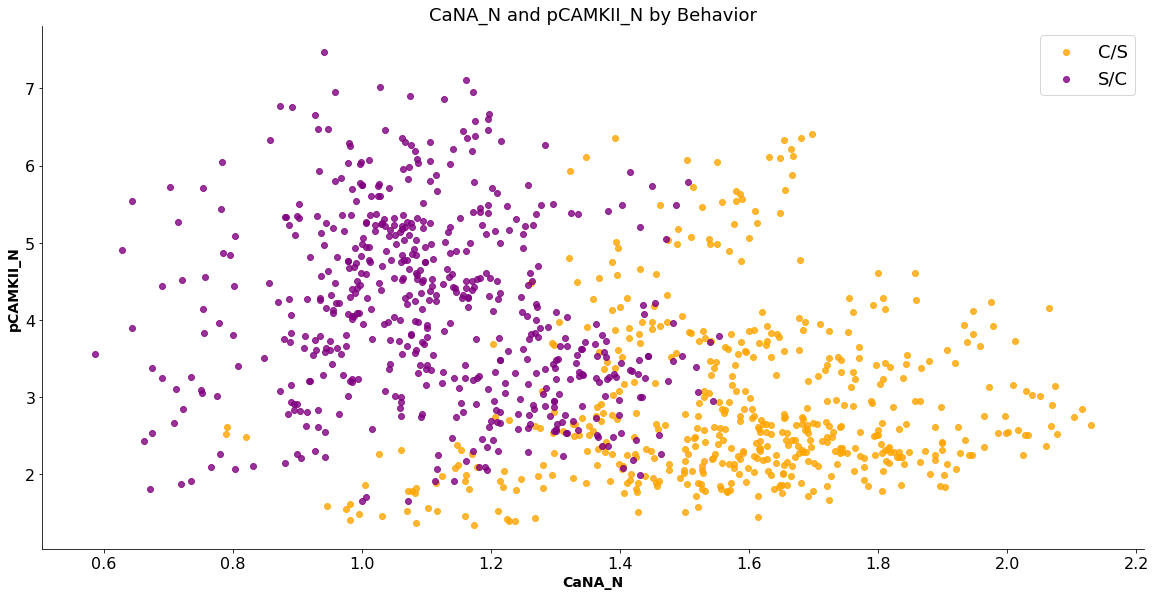

In [30]:
#Hypothesis 9: (continuing from Hypothesis 8) Whether or not a test mouse is stimulated to learn produces noticeable differences 
#              in the CaNA_N and pCAMKII_N proteins.

sn.lmplot(x="CaNA_N", y="pCAMKII_N", data=mice, fit_reg=False, palette=['orange', 'purple'], hue='Behavior', legend=False, aspect=2, height=8)
plt.title("CaNA_N and pCAMKII_N by Behavior", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("CaNA_N", fontsize=14,  fontweight='bold')
plt.ylabel("pCAMKII_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

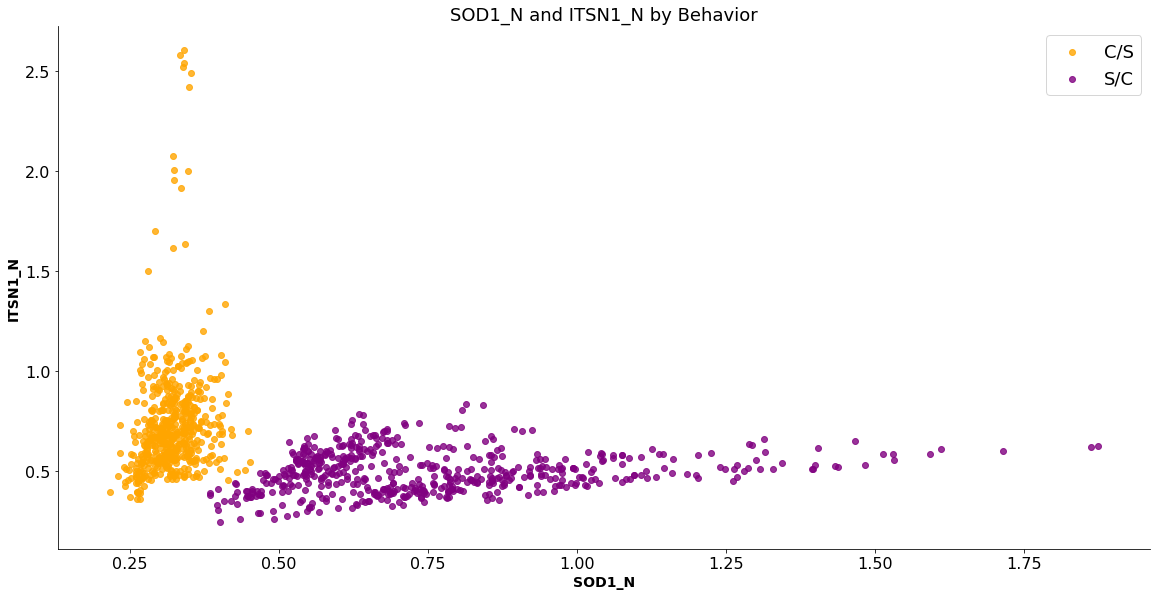

In [31]:
#Hypothesis 10: (continuing from Hypothesis 8 and 9) The SOD1_N and ITSN1_N proteins also share a similar relationship based
#               on the mean data from C/S versus S/C.

sn.lmplot(x="SOD1_N", y="ITSN1_N", data=mice, fit_reg=False, palette=['orange', 'purple'], hue='Behavior', legend=False, aspect=2, height=8)
plt.title("SOD1_N and ITSN1_N by Behavior", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("SOD1_N", fontsize=14,  fontweight='bold')
plt.ylabel("ITSN1_N", fontsize=14,  fontweight='bold')
plt.legend(loc='best', fontsize=18)

In [32]:
#------------------------------------------Task 3: Data Modelling---------------------------------------------------------------

In [33]:
#-------------------------------------Hill Climbing for KNN Feature Selection---------------------------------------------------

In [34]:
#Convert the protein data to a numpy array:

protein_data = mice[mice.columns[1:78]].to_numpy()
target = mice['class'].to_numpy()

In [35]:
#Hill Climbing to select protein features for KNN classification.

new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = protein_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " chosen features: " + str(cur_Score))

Score with 1 chosen features: 0.1527777777777778
Score with 2 chosen features: 0.2199074074074074
Score with 3 chosen features: 0.2337962962962963
Score with 4 chosen features: 0.2638888888888889
Score with 5 chosen features: 0.2962962962962963
Score with 6 chosen features: 0.3287037037037037
Score with 7 chosen features: 0.3449074074074074
Score with 8 chosen features: 0.375
Score with 9 chosen features: 0.5462962962962963
Score with 10 chosen features: 0.5509259259259259
Score with 11 chosen features: 0.6759259259259259
Score with 12 chosen features: 0.6990740740740741
Score with 13 chosen features: 0.7106481481481481
Score with 14 chosen features: 0.7361111111111112
Score with 15 chosen features: 0.7708333333333334
Score with 16 chosen features: 0.7731481481481481
Score with 17 chosen features: 0.8171296296296297
Score with 18 chosen features: 0.8240740740740741
Score with 19 chosen features: 0.875
Score with 20 chosen features: 0.8865740740740741
Score with 21 chosen features: 0.89

In [36]:
#Prints indexes of the chosen protein features from Hill Climbing.
print(str(new_Ind) + "\n")

#Prints the protein names of the chosen features.
for i in mice[mice.columns[1:78]].iloc[:, new_Ind].columns:
    print(str(i))

[31, 43, 26, 74, 58, 59, 61, 51, 10, 71, 46, 15, 45, 19, 76, 70, 63, 75, 62, 35, 38, 55, 21, 68, 56, 47, 8, 0, 69, 48, 73, 52, 13, 22, 32, 30, 49, 41, 54, 29, 42, 60, 20, 6, 1, 64, 5, 9, 72, 12]

Bcatenin_N
NUMB_N
JNK_N
EGR1_N
GluR3_N
GluR4_N
P3525_N
RRP1_N
pERK_N
pCFOS_N
pPKCG_N
pNR2A_N
pGSK3B_N
AKT_N
CaNA_N
pS6_N
PSD95_N
H3MeK4_N
pCASP9_N
pMTOR_N
NR2B_N
nNOS_N
CAMKII_N
BAD_N
Tau_N
CDK5_N
pCREB_N
DYRK1A_N
BCL2_N
S6_N
H3AcK18_N
BAX_N
pMEK_N
CREB_N
SOD1_N
APP_N
ADARB1_N
TIAM1_N
ERBB4_N
RSK_N
pP70S6_N
IL1B_N
BRAF_N
pBRAF_N
ITSN1_N
SNCA_N
pAKT_N
pELK_N
SYP_N
PKCA_N


In [37]:
#------------------------------------------K-Nearest Neighbour Classification---------------------------------------------------

In [38]:
#Create a subset of the protein data using only the selected features from Hill Climbing.
protein_data_features = mice[mice.columns[1:78]].iloc[:, new_Ind]

#Convert the dataframe of selected features to a numpy array.
selected_proteins = protein_data_features.to_numpy()

In [39]:
#Feed the data to the train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(selected_proteins, target, test_size=0.50, random_state=5, shuffle=True)

#Fit training data to KNN classifier model.
clf = KNeighborsClassifier(3, weights='distance', p=1)
fit = clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

#Print the results from confusion matrix.
cm = confusion_matrix(y_test, predicted)
print(str(cm) + "\n")

#Print the training/testing accuracy score for KNN.
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[64  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  2  0  0]
 [ 0  0 66  0  0  0  0  0]
 [ 0  0  0 71  0  0  5  0]
 [ 0  1  0  0 69  0  0  0]
 [ 0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 1  0  0  0  0  0  0 73]]

[Train/test split] score: 0.98333


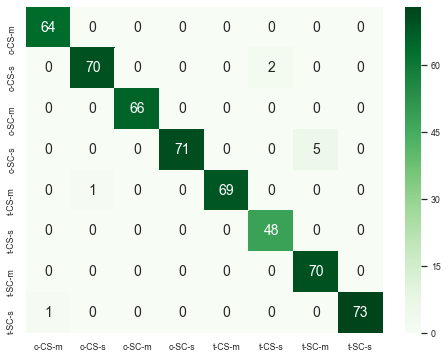

In [40]:
#Generate heatmap for the above confusion matrix.

classes = ['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s', 't-SC-m', 't-SC-s']

df_cm = pd.DataFrame(cm, classes, classes)
plt.figure(figsize=(8, 6))
sn.set(font_scale=0.8)
ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 14})
ax.set_ylim(len(cm), 0)
plt.show()

In [41]:
#Print the classification report for the data.
y_pre = fit.predict(X_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.98      1.00      0.99        64
      c-CS-s       0.99      0.97      0.98        72
      c-SC-m       1.00      1.00      1.00        66
      c-SC-s       1.00      0.93      0.97        76
      t-CS-m       1.00      0.99      0.99        70
      t-CS-s       0.96      1.00      0.98        48
      t-SC-m       0.93      1.00      0.97        70
      t-SC-s       1.00      0.99      0.99        74

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [42]:
#------------------------------------------------K-Folds Cross-Validation-------------------------------------------------------

In [43]:
#K-Folds Cross-Validation

kf = KFold(n_splits=8, random_state=4, shuffle=True)

for train_index, test_index in kf.split(selected_proteins):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = selected_proteins[train_index], selected_proteins[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   34   35   36   37   38   39   40   41   42
   43   44   45   46   48   49   50   51   52   53   54   55   56   57
   60   61   62   64   65   67   68   69   70   71   73   74   75   77
   78   79   80   81   82   83   84   85   86   87   89   90   91   93
   94   95   96   97   99  100  101  102  103  104  105  106  107  108
  109  111  113  114  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  134  135  136  137  138  139  140
  141  142  143  144  145  146  148  149  150  151  153  154  155  156
  157  158  159  160  162  165  166  167  168  169  170  171  172  173
  174  175  176  177  180  181  182  183  184  185  186  187  189  190
  191  192  193  194  195  196  197  198  199  200  201  202  203  204
  205  206  207  208  209  210  212  213  214  215  216  217  218  219

In [44]:
for k, (train_index, test_index) in enumerate(kf.split(selected_proteins)):
    X_train, X_test = selected_proteins[train_index], selected_proteins[test_index]
    y_train, y_test = target[train_index], target[test_index]
 
    #Fit the KNN classifer to the K-folds training sets and get the scores.
    clf.fit(X_train, y_train)
    print("[Fold {0}] score: {1:.4f}".format(k, clf.score(X_test, y_test)))


[Fold 0] score: 1.0000
[Fold 1] score: 0.9926
[Fold 2] score: 1.0000
[Fold 3] score: 1.0000
[Fold 4] score: 0.9926
[Fold 5] score: 1.0000
[Fold 6] score: 1.0000
[Fold 7] score: 0.9926


In [45]:
#---------------------------------------------------Decision Tree Classification------------------------------------------------

In [46]:
#----------------------------------Hill Climbing for Decision Tree Feature Selection--------------------------------------------

In [47]:
#Hill Climbing to select protein features for Decision Tree classification.

new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = protein_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target, test_size=0.3, random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.1574074074074074
Score with 2 selected features: 0.2222222222222222
Score with 3 selected features: 0.3055555555555556
Score with 4 selected features: 0.37962962962962965
Score with 5 selected features: 0.39814814814814814
Score with 6 selected features: 0.41975308641975306
Score with 7 selected features: 0.49691358024691357
Score with 8 selected features: 0.5524691358024691
Score with 9 selected features: 0.6080246913580247
Score with 10 selected features: 0.6481481481481481
Score with 11 selected features: 0.6851851851851852
Score with 12 selected features: 0.6851851851851852
Score with 13 selected features: 0.7808641975308642
Score with 14 selected features: 0.7808641975308642
Score with 15 selected features: 0.7962962962962963
Score with 16 selected features: 0.7962962962962963
Score with 17 selected features: 0.8024691358024691
Score with 18 selected features: 0.8148148148148148
Score with 19 selected features: 0.8271604938271605
Score with 20 sel

In [48]:
#Prints indexes of the chosen protein features from Hill Climbing.
print(str(new_Ind) + "\n")

#Prints the protein names of the chosen features.
for i in mice[mice.columns[1:78]].iloc[:, new_Ind].columns:
    print(str(i))

[31, 43, 26, 74, 58, 59, 61, 51, 10, 53, 34, 2, 46, 19, 76, 62, 35, 33, 21, 41, 11]

Bcatenin_N
NUMB_N
JNK_N
EGR1_N
GluR3_N
GluR4_N
P3525_N
RRP1_N
pERK_N
ARC_N
P38_N
BDNF_N
pPKCG_N
AKT_N
CaNA_N
pCASP9_N
pMTOR_N
MTOR_N
CAMKII_N
TIAM1_N
pJNK_N


In [49]:
#Create a subset of the protein data using only the selected features from Hill Climbing.
protein_data_features = mice[mice.columns[1:78]].iloc[:, new_Ind]

#Convert the dataframe of selected features to a numpy array.
selected_proteins = protein_data_features.to_numpy()

In [50]:
#Create the Decision Tree Classifier using the features selected from Hill Climbing
X_train, X_test, y_train, y_test = train_test_split(selected_proteins, target, test_size=0.50, random_state=5, shuffle=True)

clf = DecisionTreeClassifier(criterion='gini', max_features=None, min_samples_leaf=3, min_samples_split=8, random_state=5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)

#Print the confusion matrix.
cm = confusion_matrix(y_test, y_pre)
print(str(cm) + "\n")

#Print the training/testing accuracy score for Decision Tree.
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

[[49  8  0  0  5  0  2  0]
 [ 6 49  0  1  8  4  3  1]
 [ 0  1 53  2  0  0  9  1]
 [ 2  4  5 46  0  2 16  1]
 [ 5  6  0  0 53  6  0  0]
 [ 3 10  0  0  4 31  0  0]
 [ 1  1 15  3  0  0 49  1]
 [ 3  4  1  4  4  2  3 53]]

[Train/test split] score: 0.70926


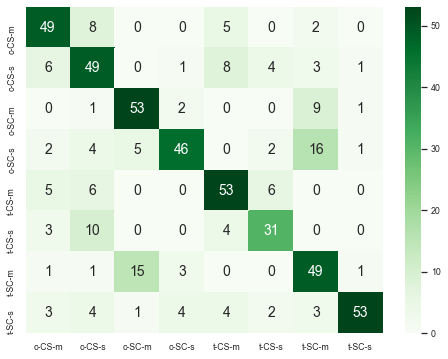

In [51]:
#Generate heatmap for the above confusion matrix.

df_cm = pd.DataFrame(cm, classes, classes)
plt.figure(figsize=(8, 6))
sn.set(font_scale=0.8)
ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size": 14})
ax.set_ylim(len(cm), 0)
plt.show()

In [52]:
print(target)

['c-CS-m' 'c-CS-m' 'c-CS-m' ... 't-SC-s' 't-SC-s' 't-SC-s']


In [53]:
#Print the classification report for Decision Tree.
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

      c-CS-m       0.71      0.77      0.74        64
      c-CS-s       0.59      0.68      0.63        72
      c-SC-m       0.72      0.80      0.76        66
      c-SC-s       0.82      0.61      0.70        76
      t-CS-m       0.72      0.76      0.74        70
      t-CS-s       0.69      0.65      0.67        48
      t-SC-m       0.60      0.70      0.64        70
      t-SC-s       0.93      0.72      0.81        74

    accuracy                           0.71       540
   macro avg       0.72      0.71      0.71       540
weighted avg       0.72      0.71      0.71       540



In [54]:
#------------------------------------------------K-Folds Cross-Validation-------------------------------------------------------

In [55]:
#K-Folds Cross-Validation

kf = KFold(n_splits=8, random_state=4, shuffle=True)

for train_index, test_index in kf.split(selected_proteins):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = selected_proteins[train_index], selected_proteins[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   34   35   36   37   38   39   40   41   42
   43   44   45   46   48   49   50   51   52   53   54   55   56   57
   60   61   62   64   65   67   68   69   70   71   73   74   75   77
   78   79   80   81   82   83   84   85   86   87   89   90   91   93
   94   95   96   97   99  100  101  102  103  104  105  106  107  108
  109  111  113  114  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  134  135  136  137  138  139  140
  141  142  143  144  145  146  148  149  150  151  153  154  155  156
  157  158  159  160  162  165  166  167  168  169  170  171  172  173
  174  175  176  177  180  181  182  183  184  185  186  187  189  190
  191  192  193  194  195  196  197  198  199  200  201  202  203  204
  205  206  207  208  209  210  212  213  214  215  216  217  218  219

In [56]:
#Fit the Decision Tree classifer to the K-folds training sets and get the scores.
for k, (train_index, test_index) in enumerate(kf.split(selected_proteins)):
    X_train, X_test = selected_proteins[train_index], selected_proteins[test_index]
    y_train, y_test = target[train_index], target[test_index]
 

    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.4f}".format(k, clf.score(X_test, y_test)))


[fold 0] score: 0.8074
[fold 1] score: 0.7630
[fold 2] score: 0.8148
[fold 3] score: 0.8222
[fold 4] score: 0.7407
[fold 5] score: 0.7778
[fold 6] score: 0.7481
[fold 7] score: 0.7778


In [57]:
#-----------------------------------------------Tree Visualization--------------------------------------------------------------

In [58]:
#Graphviz outpit for tree visualisation.
feature_names = mice[mice.columns[1:78]].iloc[:, new_Ind].columns
class_names = mice['class'].unique()


with open('decision_tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)